<a href="https://colab.research.google.com/github/Eduardo-mar/simple_neuralNet/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

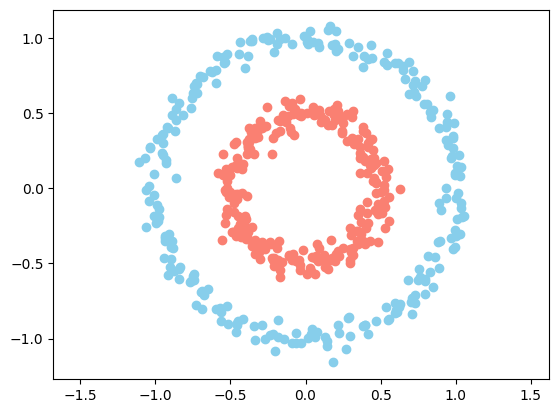

In [25]:
# CREAR EL DATASET

n= 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:, np.newaxis]

plt.scatter(X[Y[:, 0] == 0, 0], X[Y[:, 0] ==0, 1], c="skyblue")
plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], c="salmon")
plt.axis("equal")
plt.show()

In [8]:
# CLASE DE LA CAPA DE LA RED

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

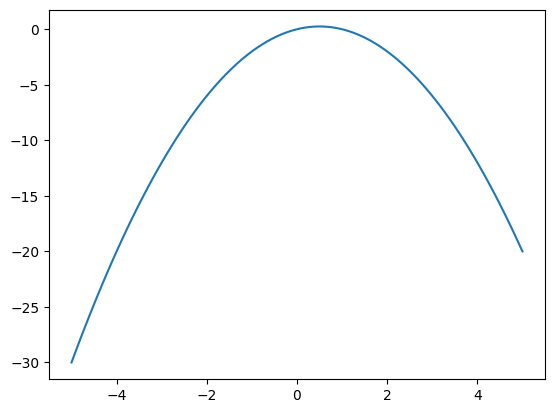

In [12]:
# FUNCIONES DE ACTIVACION

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 -x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[1](_x))

In [14]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#...

def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))

  return nn

In [29]:
topology = [p, 4, 8, 1]

neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):

  out = [(None, X)]
   # Forward pass
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  # print(l2_cost[0](out[-1][1], Y))

  if train:

    # Backward pass
    deltas = []

    for l in reversed(range(0, len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]
      if l == len(neural_net) - 1:
        # Calcular delta última capa.
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
      else:
        # Calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W
      # Gradient descent
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

  return out[-1][1]


# train(neural_net, X, Y, l2_cost, 0.5)
# print("")

0.2534114030242193



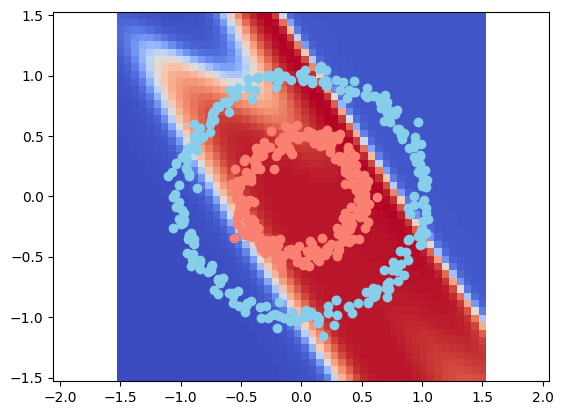

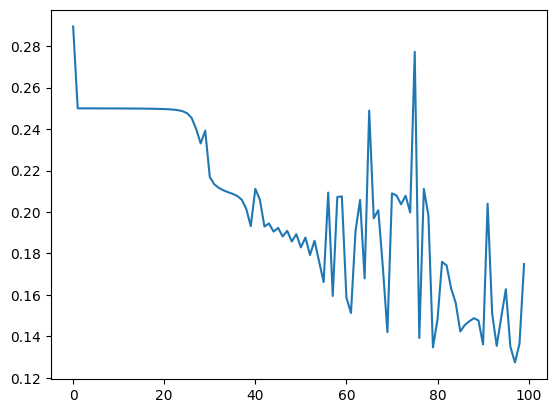

0.14276546056575481
0.11612234508286874
0.11040347145240947
0.22464268706162793
0.24533400996011262
0.16408354911225634
0.1392376591574469
0.11718358762489828
0.10700245096346116
0.1126527892373139
0.11785739339389431
0.179794688109484
0.11566023447933238
0.15157848924070144
0.1358672433675409
0.1776379519747568
0.1039875595917507
0.12506893244959302
0.259881230060956
0.25121439693351505
0.179184462617299
0.12874249606545776
0.10978190719708572
0.10813481319628786


In [39]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i % 25 == 0:
    loss.append(l2_cost[0](pY, Y))

    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _Y, cmap='coolwarm')
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c= "skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c= "salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)